In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # NOQA
import scipy.io as sio
import cv2
import h5py
import numpy as np

In [9]:
path ='/srv/home/chenyu/TensorDenoise/Simulatons/Si_dislocation_simulations/'
raw_data = sio.loadmat(path + 'Simulation_noisy_SiDisl_slc5_1000FPS.mat')
raw_data = raw_data['datacube']

truth_data = np.load(path + 'Simulation_truth_SiDisl_slc5_1000FPS.npy')

denoised_data = sio.loadmat(path + 'Simulation_tensor_SiDisl_slc5_1000FPS.mat')
denoised_data = denoised_data['est_HOOI']

In [29]:
path ='/srv/home/chenyu/TensorDenoise/Simulatons/STO_simulation/'
raw_data = sio.loadmat(path + 'Simulation_noisy_STO_slice_5_1000FPS_fullsize.mat')
raw_data = raw_data['datacube']
print(raw_data.shape)

truth_data = np.load(path + 'Simulation_truth_STO_slice_5_1000FPS_fullsize.npy')
print(truth_data.shape)

denoised_data = sio.loadmat(path + 'Simulation_tensor_STO_slice_5_1000FPS_fullsize.mat')
denoised_data = denoised_data['est_HOOI']
print(denoised_data.shape)

noise = sio.loadmat(path+'Simulation_noisy_STO_slice_5_1000FPS_fullsize_noise.mat')
noise = noise['Noise']
print(noise.shape)

(114, 114, 16384)
(114, 114, 16384)
(114, 114, 16384)
(114, 114, 16384)


(114, 114, 10)


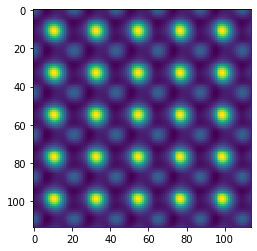

In [38]:
data_subset = truth_data[:,:,0:10]
# data_subset = raw_data[0:1,0:2,0:100]
# data_subset = raw_data[:,:,0:10]
print(data_subset.shape)
plt.imshow(data_subset[:,:,1])

TypeError: Invalid shape (114, 114, 10) for image data

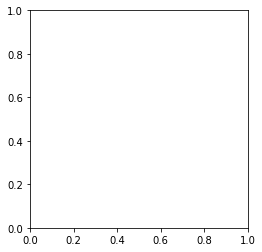

In [26]:
plt.imshow(np.squeeze(data_subset),cmap='gray')
plt.axis('off')

In [39]:
data_subset = (data_subset - np.amin(data_subset))/(np.amax(data_subset) - np.amin(data_subset))
np.amin(data_subset)

0.0

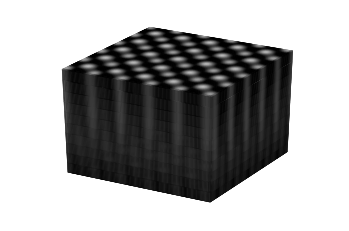

In [40]:
# Normalize the data to [0,1] in order to be used fro rgb argument

data_subset = (data_subset - np.amin(data_subset))/(np.amax(data_subset) - np.amin(data_subset))
data_subset = np.sqrt(data_subset)
# Generate coordinates
r, g, b = np.indices((data_subset.shape[0]+1,data_subset.shape[1]+1,data_subset.shape[2]+1))
colors = np.zeros(data_subset.shape + (3,))
colors[..., 0] = data_subset
colors[..., 1] = data_subset
colors[..., 2] = data_subset
# Fill all the voxels, thus use 3D array of ones
filled = np.ones(data_subset.shape)

# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(r, g, b, filled,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)
ax.set(xlabel='r', ylabel='g', zlabel='b')
plt.axis('off')
ax.view_init(30,30)

plt.show()

In [14]:
decomposition = sio.loadmat(path + 'Simulation_noisy_STO_slice_5_1000FPS_fullsize_decomposition.mat')
U1 = decomposition['U1']
U2 = decomposition['U2']
U3 = decomposition['U3']
Core = decomposition['S']
print(U1.shape)
print(U2.shape)
print(U3.shape)

(114, 7)
(114, 7)
(16384, 30)


(-0.5, 29.5, 9.5, -0.5)

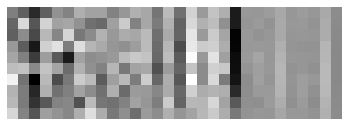

In [23]:
plt.imshow(U3[0:10,:],cmap='gray')
plt.axis('off')

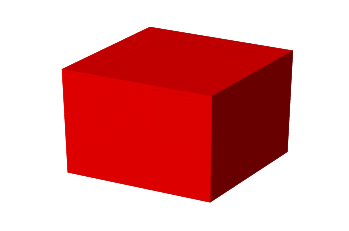

In [49]:
# Core = Core[:,:,0:7]
# Core[-1,-1,-1] = 0
Core = (Core - np.amin(Core))/(np.amax(Core) - np.amin(Core))
Core = np.sqrt(Core)
# Generate coordinates
r, g, b = np.indices((Core.shape[0]+1,Core.shape[1]+1,Core.shape[2]+1))
colors = np.zeros(Core.shape + (3,))
colors[..., 0] = np.sqrt(Core)
# colors[..., 1] = np.sqrt(Core)
# colors[..., 2] = np.sqrt(Core)
# Fill all the voxels, thus use 3D array of ones
filled = np.ones(Core.shape)

# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(r, g, b, filled,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5,cmap='hot')
ax.set(xlabel='r', ylabel='g', zlabel='b')
plt.axis('off')
# ax.view_init(30,30)

plt.show()

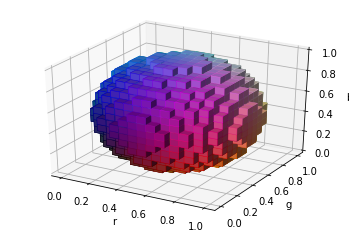

In [48]:
def midpoints(x):
    sl = ()
    for i in range(x.ndim):
        x = (x[sl + np.index_exp[:-1]] + x[sl + np.index_exp[1:]]) / 2.0
        sl += np.index_exp[:]
    return x

# prepare some coordinates, and attach rgb values to each
r, g, b = np.indices((17, 17, 17)) / 16.0
rc = midpoints(r)
gc = midpoints(g)
bc = midpoints(b)

# define a sphere about [0.5, 0.5, 0.5]
sphere = (rc - 0.5)**2 + (gc - 0.5)**2 + (bc - 0.5)**2 < 0.5**2

# combine the color components
colors = np.zeros(sphere.shape + (3,))
colors[..., 0] = rc
colors[..., 1] = gc
colors[..., 2] = bc

# and plot everything
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.voxels(r, g, b, sphere,
          facecolors=colors,
          edgecolors=np.clip(2*colors - 0.5, 0, 1),  # brighter
          linewidth=0.5)
ax.set(xlabel='r', ylabel='g', zlabel='b')

plt.show()